# import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import data from a website

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/cajjster/data_files/main/vgsales.csv")
df.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## inspect dataset

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
type(df['Name'])

pandas.core.series.Series

In [16]:
df.shape

(16291, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int64  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


In [10]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
df.describe(include='O')

,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


## Selecting Columns in Pandas

In [12]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global Sales'],
      dtype='object')

 ### sophisticated and most popular  way of selecting columns

In [17]:
df['Genre']

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16286        Platform
16287         Shooter
16288          Racing
16289          Puzzle
16290        Platform
Name: Genre, Length: 16291, dtype: object

### Lazy way to select a column

In [18]:
df.Name # may not work if the column name is not a single word

0                                              Wii Sports
1                                       Super Mario Bros.
2                                          Mario Kart Wii
3                                       Wii Sports Resort
4                                Pokemon Red/Pokemon Blue
                               ...                       
16286                  Woody Woodpecker in Crazy Castle 5
16287                       Men in Black II: Alien Escape
16288    SCORE International Baja 1000: The Official Game
16289                                          Know How 2
16290                                    Spirits & Spells
Name: Name, Length: 16291, dtype: object

In [20]:
df[['Name','Year']]

,Name,Year
0,Wii Sports,2006
1,Super Mario Bros.,1985
2,Mario Kart Wii,2008
3,Wii Sports Resort,2009
4,Pokemon Red/Pokemon Blue,1996
...,...,...
16286,Woody Woodpecker in Crazy Castle 5,2002
16287,Men in Black II: Alien Escape,2003
16288,SCORE International Baja 1000: The Official Game,2008
16289,Know How 2,2010


In [23]:
df._get_numeric_data()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,2006,41.49,29.02,3.77,8.46,82.74
1,1985,29.08,3.58,6.81,0.77,40.24
2,2008,15.85,12.88,3.79,3.31,35.82
3,2009,15.75,11.01,3.28,2.96,33.00
4,1996,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16286,2002,0.01,0.00,0.00,0.00,0.01
16287,2003,0.01,0.00,0.00,0.00,0.01
16288,2008,0.00,0.00,0.00,0.00,0.01
16289,2010,0.00,0.01,0.00,0.00,0.01


In [28]:
df.select_dtypes("number") # number =int+float
df.select_dtypes('int')
df.select_dtypes('object')
df.select_dtypes(['object','int'])

,Name,Platform,Year,Genre,Publisher
0,Wii Sports,Wii,2006,Sports,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo
...,...,...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco
16287,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames
16288,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision
16289,Know How 2,DS,2010,Puzzle,7G//AMES


In [35]:
df[[col for col in df.columns if df[col].nunique()<50 ]]

,Platform,Year,Genre
0,Wii,2006,Sports
1,NES,1985,Platform
2,Wii,2008,Racing
3,Wii,2009,Sports
4,GB,1996,Role-Playing
...,...,...,...
16286,GBA,2002,Platform
16287,GC,2003,Shooter
16288,PS2,2008,Racing
16289,DS,2010,Puzzle


# Methods and Attributes

In [36]:
df.shape

(16291, 10)

In [38]:
df.drop(columns='Name').shape

(16291, 9)

In [43]:
df['Year'].value_counts(ascending=True,normalize=True)

2020    0.000061
2017    0.000184
1980    0.000552
1985    0.000859
1984    0.000859
1988    0.000921
1987    0.000982
1990    0.000982
1989    0.001044
1983    0.001044
1986    0.001289
1982    0.002210
1991    0.002517
1992    0.002639
1981    0.002824
1993    0.003683
1994    0.007427
1995    0.013443
1996    0.016144
1997    0.017740
1999    0.020748
2016    0.020993
2000    0.021423
1998    0.023264
2001    0.029587
2013    0.033515
2014    0.035602
2015    0.037690
2012    0.040206
2004    0.045669
2003    0.047572
2002    0.050887
2005    0.057455
2006    0.061875
2011    0.069732
2007    0.073722
2010    0.077159
2008    0.087656
2009    0.087840
Name: Year, dtype: float64

# Intuition or common sense in Pandas

In [49]:
year = df['Year']
type(year)
year.shape

(16291,)

In [58]:
year.nunique()  # nunique return numbers of  unique element on that coluns
year.value_counts().shape
df['Platform'].value_counts().shape

(31,)

In [61]:
year.sort_values()
df.sort_values(by='Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
4683,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41
8208,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
6984,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
8448,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
8159,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...
16112,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01
621,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.46
15247,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00,0.02
7699,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.08,0.09,0.00,0.02,0.19


## Method Chaining in pandas

<AxesSubplot:>

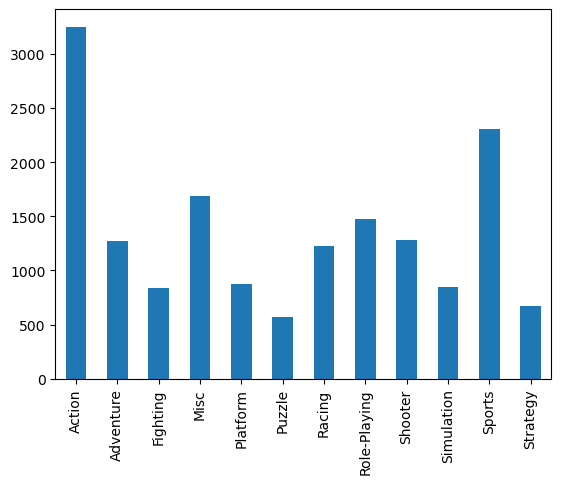

In [71]:
df['Genre'].value_counts().sort_index().plot.bar()


## Understanding loc[]->location iloc[] int location

In [80]:
#iloc[start:stop:step]
df.iloc[1:14:2]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
11,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
13,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72


In [81]:
#[start:stop:stem,start:stop:step]
df.iloc[:,2:5]

,Year,Genre,Publisher
0,2006,Sports,Nintendo
1,1985,Platform,Nintendo
2,2008,Racing,Nintendo
3,2009,Sports,Nintendo
4,1996,Role-Playing,Nintendo
...,...,...,...
16286,2002,Platform,Kemco
16287,2003,Shooter,Infogrames
16288,2008,Racing,Activision
16289,2010,Puzzle,7G//AMES


In [84]:
df.loc[:50,'Year']

0     2006
1     1985
2     2008
3     2009
4     1996
5     1989
6     2006
7     2006
8     2009
9     1984
10    2005
11    2005
12    1999
13    2007
14    2009
15    2010
16    2013
17    2004
18    1990
19    2005
20    2006
21    1989
22    1988
23    2013
24    2002
25    2002
26    2010
27    2005
28    2001
29    2011
30    1998
31    2010
32    2013
33    2015
34    2012
35    2012
36    2009
37    2011
38    2001
39    2008
40    2010
41    2005
42    2011
43    2007
44    2014
45    2009
46    1996
47    2004
48    2007
49    2014
50    1992
Name: Year, dtype: int64

In [85]:
df.loc[:100,['Year','Name']]

,Year,Name
0,2006,Wii Sports
1,1985,Super Mario Bros.
2,2008,Mario Kart Wii
3,2009,Wii Sports Resort
4,1996,Pokemon Red/Pokemon Blue
...,...,...
96,1988,Super Mario Bros. 2
97,2014,Super Smash Bros. for Wii U and 3DS
98,2008,Call of Duty: World at War
99,2011,Battlefield 3


In [90]:
# changing values
df.loc[100,'NA_Sales']=2.3
df.loc[100,'NA_Sales']

2.3

In [95]:
for i in df[['Name','Platform','Year']]:
    print(i.upper())
    print(df[i].unique())
    print()

NAME
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2']

PLATFORM
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

YEAR
[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2003
 1986 2000 1995 2016 1991 1981 1987 1980 1983 2020 2017]



In [104]:
wii = df['Platform']=='Wii'
# all are same
df[wii]
df[df['Platform']=='Wii']
df.loc[wii]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...
16212,Teenage Mutant Ninja Turtles,Wii,2007,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16246,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16266,Mini Desktop Racing,Wii,2007,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
16267,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01


In [107]:
df.loc[df['JP_Sales']>df['EU_Sales'],'Name']

1                                        Super Mario Bros.
4                                 Pokemon Red/Pokemon Blue
5                                                   Tetris
12                             Pokemon Gold/Pokemon Silver
17                           Grand Theft Auto: San Andreas
                               ...                        
16268                                Neo Angelique Special
16273                                            Real Rode
16280                             Mezase!! Tsuri Master DS
16282    Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...
16283    Eiyuu Densetsu: Sora no Kiseki Material Collec...
Name: Name, Length: 4554, dtype: object

In [114]:
df.loc[(df['Platform']=='Wii') & (df['Genre']=='Role-Playing')].sort_values(by='Global Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
709,Monster Hunter Tri,Wii,2009,Role-Playing,Nintendo,0.67,0.41,1.05,0.11,2.25
1127,Pokemon Battle Revolution,Wii,2006,Role-Playing,Nintendo,0.80,0.38,0.30,0.13,1.61
2083,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.49,0.26,0.16,0.08,0.98
2126,Dragon Quest X,Wii,2012,Role-Playing,Square Enix,0.00,0.00,0.96,0.00,0.96
2818,Dragon Quest Swords: The Masked Queen and the ...,Wii,2007,Role-Playing,Square Enix,0.18,0.01,0.50,0.02,0.71
2934,The Last Story,Wii,2011,Role-Playing,Nintendo,0.32,0.13,0.18,0.04,0.68
3234,Muramasa: The Demon Blade,Wii,2009,Role-Playing,Rising Star Games,0.33,0.13,0.11,0.04,0.61
3698,Tales of Symphonia: Dawn of the New World,Wii,2008,Role-Playing,Namco Bandai Games,0.22,0.05,0.24,0.03,0.54
4110,Dragon Quest 25 Shuunen Kinin: Famicom & Super...,Wii,2011,Role-Playing,Square Enix,0.00,0.00,0.47,0.00,0.47
4679,Marvel: Ultimate Alliance,Wii,2006,Role-Playing,Activision,0.37,0.01,0.00,0.03,0.41


In [115]:
action = df['Genre']=='Action'
shooter=df['Genre']=='Shooter'
df.loc[action | shooter]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
...,...,...,...,...,...,...,...,...,...,...
16275,Planet Monsters,GBA,2001,Action,Titus,0.01,0.00,0.00,0.00,0.01
16276,Carmageddon 64,N64,1999,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01
16278,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01
16282,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01


In [116]:
since_2010=df["Year"]>=2010
df.loc[since_2010 &(action | shooter)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
...,...,...,...,...,...,...,...,...,...,...
16244,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16260,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16262,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16278,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01


In [118]:
# isin()
top_3_publishers= df.Publisher.isin(['Electro Arts','Activision','Namco Bandai Games'])
df.loc[top_3_publishers]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
...,...,...,...,...,...,...,...,...,...,...
16230,Mushi Bugyou,3DS,2013,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16232,Transformers: Fall of Cybertron,PC,2012,Action,Activision,0.01,0.00,0.00,0.00,0.01
16244,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16260,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01


In [119]:
genres = df.Genre.isin(['Sports','Action','Shooter'])
sales_2M=df["Global Sales"]>=2
df.loc[genres & top_3_publishers & sales_2M]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
55,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
61,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72,2.63,0.04,0.82,10.21


In [121]:
# between allows to specify a range
between_2M_10M= df['Global Sales'].between(2,10)
y_90=df['Year'].between(1990,1999)
df.loc[between_2M_10M & y_90]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
63,Mario Kart 64,N64,1996,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87
66,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
69,Gran Turismo 2,PS,1999,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49
71,Donkey Kong Country,SNES,1994,Platform,Nintendo,4.36,1.71,3.00,0.23,9.30
76,Super Mario Kart,SNES,1992,Racing,Nintendo,3.54,1.24,3.81,0.18,8.76
...,...,...,...,...,...,...,...,...,...,...
796,Warcraft: Orcs & Humans,PC,1994,Strategy,Activision,0.89,1.08,0.00,0.11,2.08
808,R4: Ridge Racer Type 4,PS,1998,Racing,Namco Bandai Games,0.68,0.46,0.79,0.13,2.06
817,NBA Jam,GEN,1992,Sports,Arena Entertainment,1.75,0.25,0.00,0.05,2.05
827,1080°: TenEighty Snowboarding,N64,1998,Sports,Nintendo,1.25,0.61,0.13,0.05,2.03


In [124]:
df.loc[~df['Genre'].isin(['Puzzle','Strategy','Adventure']) & y_90]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
18,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
30,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
46,Super Mario 64,N64,1996,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89
...,...,...,...,...,...,...,...,...,...,...
15901,Legoland,PC,1999,Action,LEGO Media,0.00,0.01,0.00,0.00,0.01
15930,Victory Spike,PS,1996,Sports,Imagineer,0.00,0.00,0.01,0.00,0.01
16077,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0.00,0.01,0.00,0.00,0.01
16201,Samurai Shodown: Warrios Rage,PS,1999,Fighting,SNK,0.01,0.00,0.00,0.00,0.01


# Most Useful Methods for data Analysis

In [125]:
# query() method
df.query("JP_Sales<NA_Sales")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16284,Myst IV: Revelation,PC,2004,Adventure,Ubisoft,0.01,0.00,0.00,0.00,0.01
16285,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01


In [127]:
df.query("Publisher=='Ubisoft' and Year > 2014")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
350,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
407,Assassin's Creed Syndicate,PS4,2015,Action,Ubisoft,0.80,1.92,0.06,0.50,3.28
749,Tom Clancy's Rainbow Six: Siege,PS4,2015,Shooter,Ubisoft,0.54,1.16,0.13,0.32,2.15
761,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
835,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01
1515,Tom Clancy's Rainbow Six: Siege,XOne,2015,Shooter,Ubisoft,0.73,0.44,0.00,0.12,1.29
1527,Assassin's Creed Syndicate,XOne,2015,Action,Ubisoft,0.61,0.56,0.00,0.11,1.28
1651,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,1.20
2400,Far Cry: Primal,XOne,2016,Action,Ubisoft,0.46,0.32,0.00,0.07,0.85
3391,Just Dance 2016,WiiU,2015,Misc,Ubisoft,0.28,0.25,0.00,0.05,0.58


In [130]:
ps3 = df.query("Platform=='PS3'")
ps3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
54,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
...,...,...,...,...,...,...,...,...,...,...
16147,Hyperdimension Neptunia mk2,PS3,2011,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01
16148,Shin Koihime Musou: Otome Taisen * Sangokushi ...,PS3,2014,Adventure,Views,0.00,0.00,0.01,0.00,0.01
16177,Muv-Luv Alternative,PS3,2012,Simulation,5pb,0.00,0.00,0.01,0.00,0.01
16216,Akatsuki no Goei Trinity,PS3,2012,Adventure,5pb,0.00,0.00,0.01,0.00,0.01


In [134]:
df['Platform'].unique().shape

(31,)

In [135]:
df.nunique()

Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          407
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global Sales      621
dtype: int64

In [138]:
for i in df.select_dtypes('object'):
    print(df[i].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertain

In [143]:
# rename and set index
ps3.reset_index(drop=True,inplace=True)
ps3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
1,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
2,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
3,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
4,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
...,...,...,...,...,...,...,...,...,...,...
1299,Hyperdimension Neptunia mk2,PS3,2011,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01
1300,Shin Koihime Musou: Otome Taisen * Sangokushi ...,PS3,2014,Adventure,Views,0.00,0.00,0.01,0.00,0.01
1301,Muv-Luv Alternative,PS3,2012,Simulation,5pb,0.00,0.00,0.01,0.00,0.01
1302,Akatsuki no Goei Trinity,PS3,2012,Adventure,5pb,0.00,0.00,0.01,0.00,0.01


In [150]:
ps3.rename({'EU_Sales':'Europe','NA_Sales':'North America'},axis=1)

,Platform,Year,Genre,Publisher,North America,Europe,JP_Sales,Other_Sales,Global Sales
Name,,,,,,,,,
Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
...,...,...,...,...,...,...,...,...,...
Hyperdimension Neptunia mk2,PS3,2011,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01
Shin Koihime Musou: Otome Taisen * Sangokushi Engi,PS3,2014,Adventure,Views,0.00,0.00,0.01,0.00,0.01
Muv-Luv Alternative,PS3,2012,Simulation,5pb,0.00,0.00,0.01,0.00,0.01


In [152]:
ps3.rename({'Call of Duty: Black Ops':'Md Jewel rana'},axis=0)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
Name,,,,,,,,,
Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
Md Jewel rana,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
...,...,...,...,...,...,...,...,...,...
Hyperdimension Neptunia mk2,PS3,2011,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01
Shin Koihime Musou: Otome Taisen * Sangokushi Engi,PS3,2014,Adventure,Views,0.00,0.00,0.01,0.00,0.01
Muv-Luv Alternative,PS3,2012,Simulation,5pb,0.00,0.00,0.01,0.00,0.01


<AxesSubplot:xlabel='Name'>

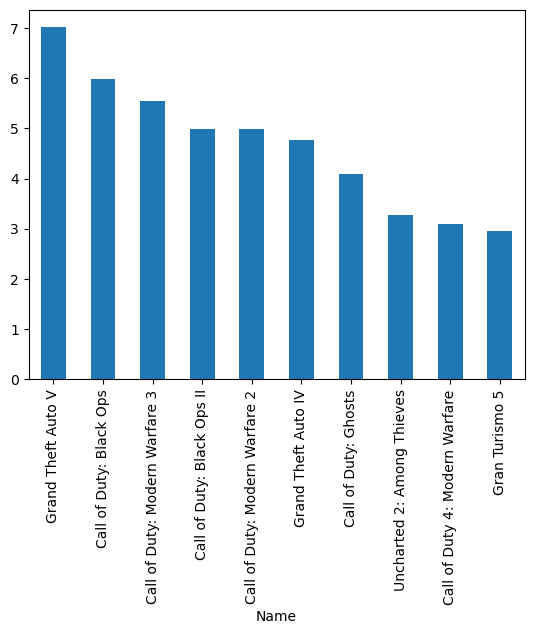

In [156]:
# nlargest and nsmallest
ps3.nlargest(n=10,columns="NA_Sales").loc[:,'NA_Sales'].plot.bar()

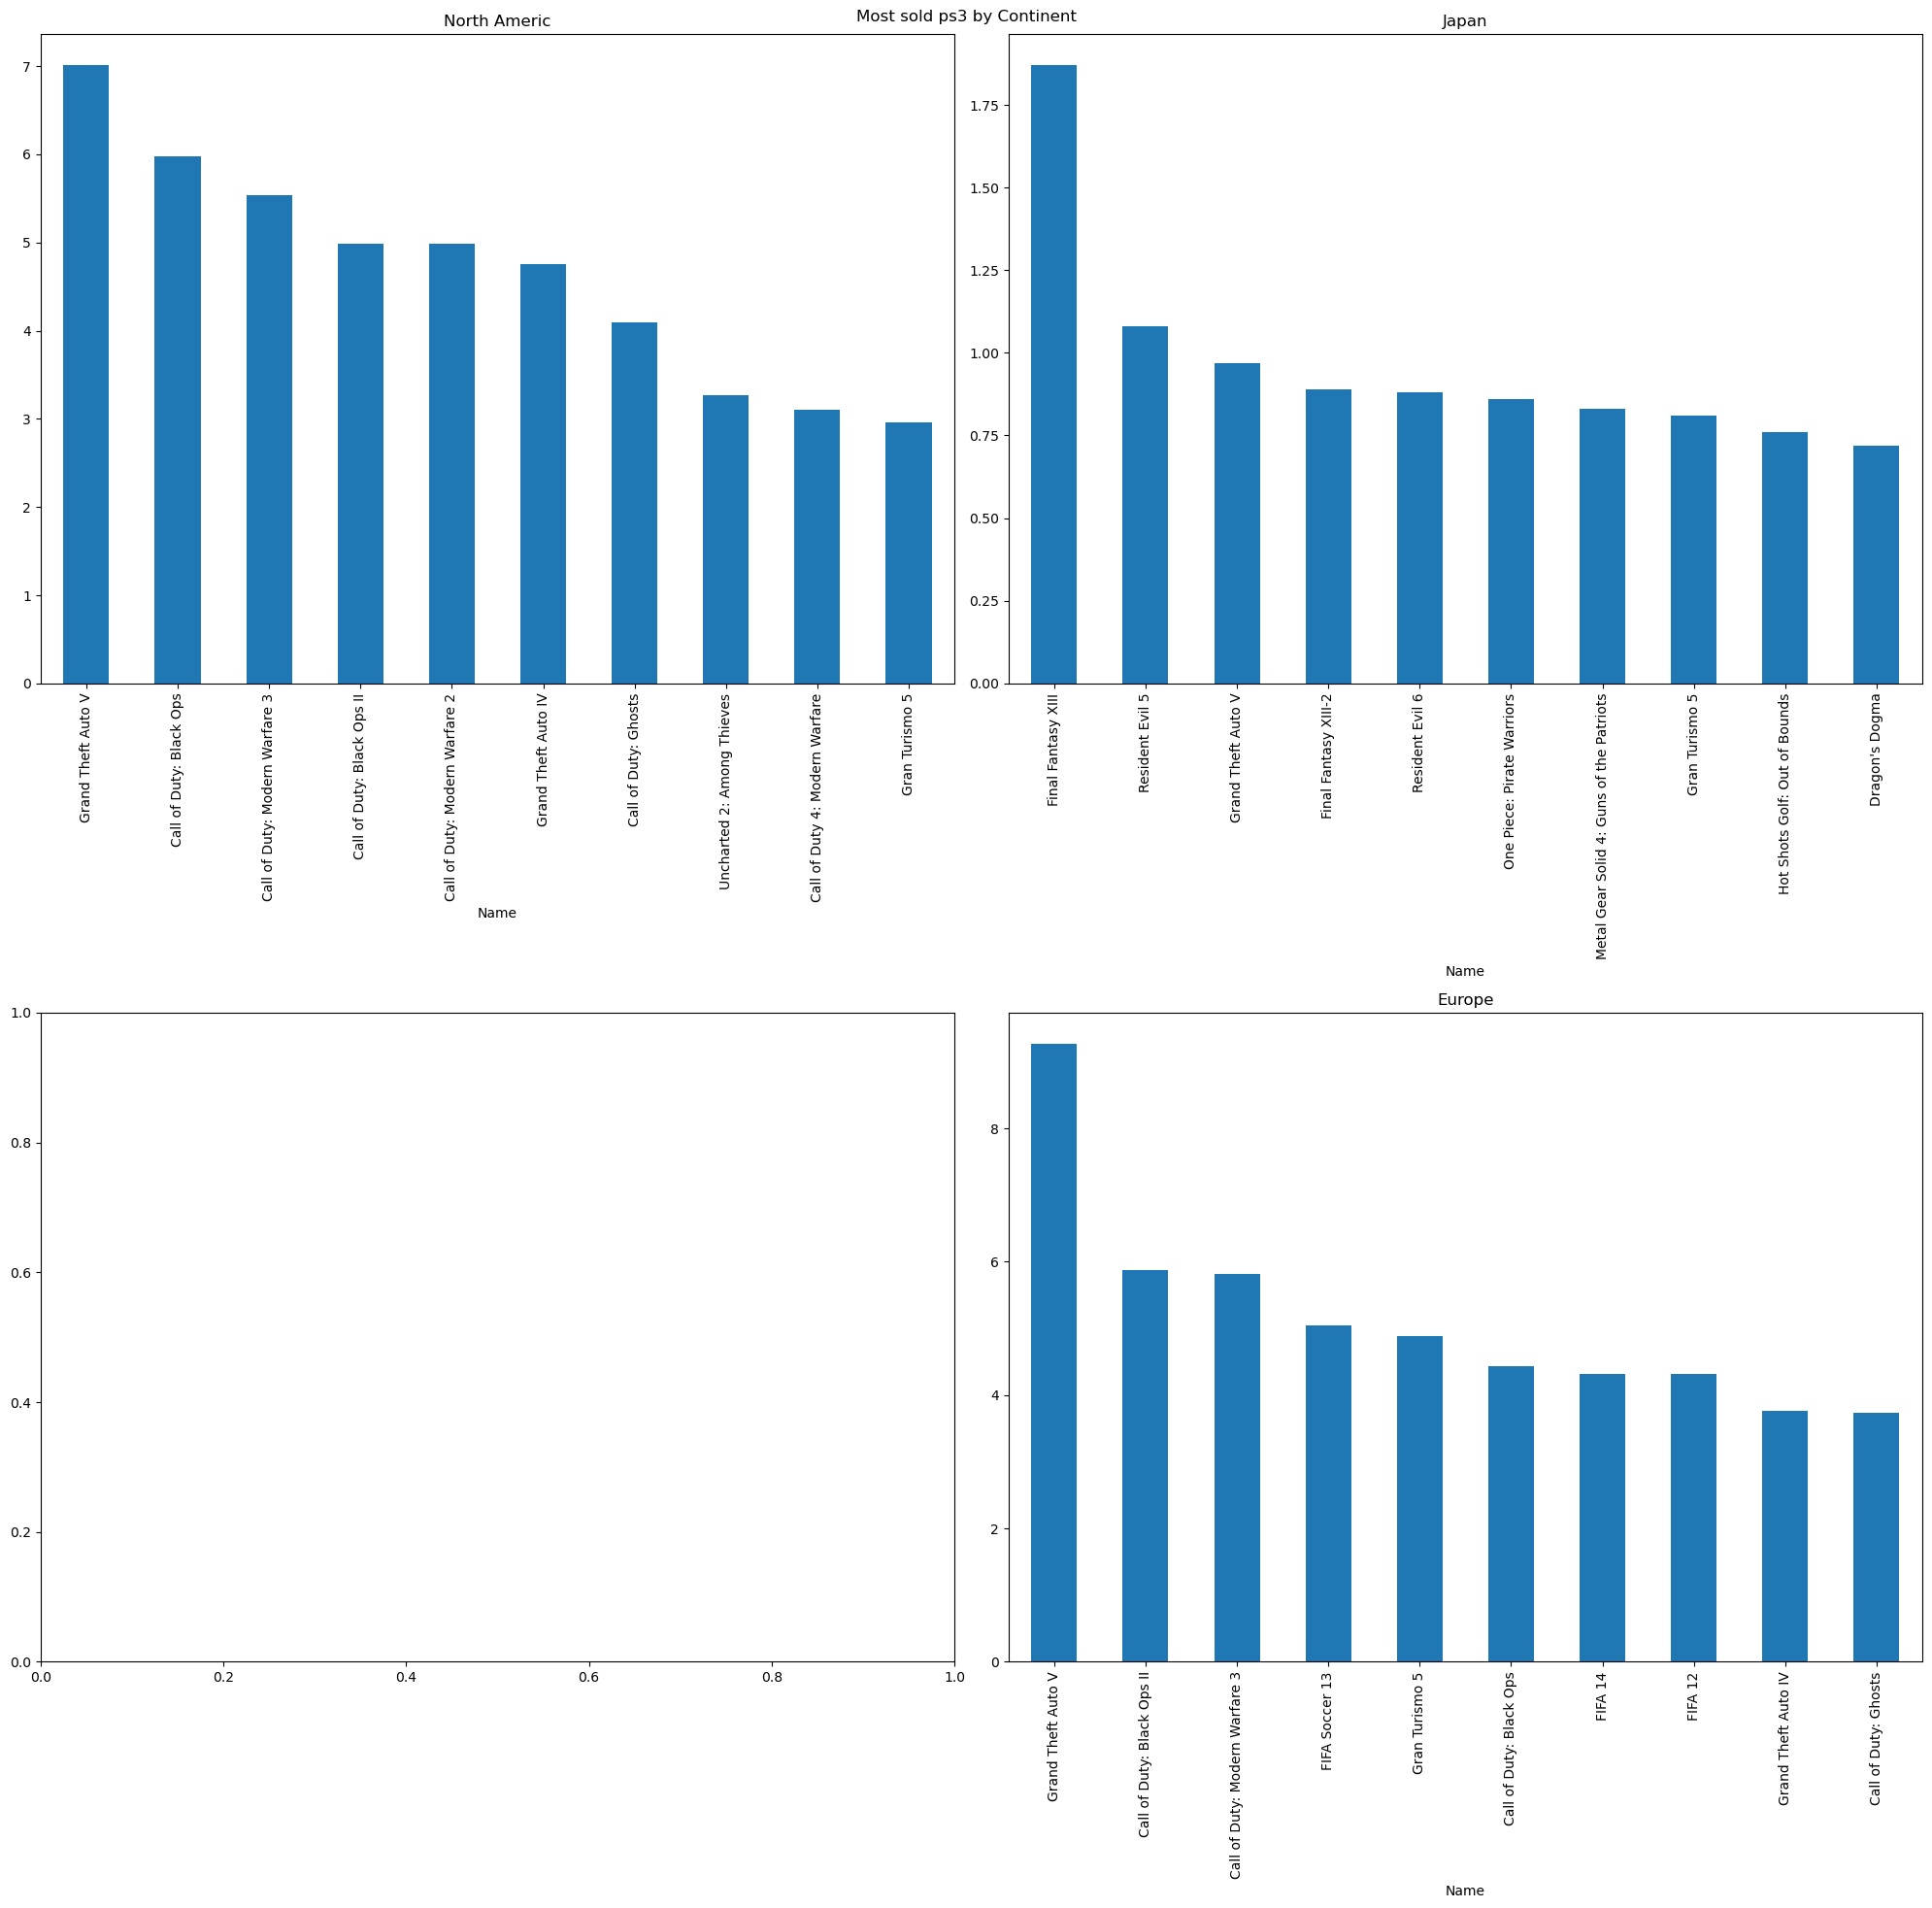

In [163]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
ps3.nlargest(n=10,columns='NA_Sales').loc[:,'NA_Sales'].plot.bar(ax=ax[0][0])
ax[0][0].set_title('North Americ')
ps3.nlargest(n=10,columns='JP_Sales').loc[:,'JP_Sales'].plot.bar(ax=ax[0][1])
ax[0][1].set_title('Japan')
ps3.nlargest(n=10,columns='EU_Sales').loc[:,'EU_Sales'].plot.bar(ax=ax[1][1])
ax[1][1].set_title('Europe')
fig.suptitle("Most sold ps3 by Continent")
fig.tight_layout()

In [167]:
fig.savefig('abc.PNG',transparent=True)


In [168]:
ps3.nsmallest(n=5,columns="Global Sales")

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
Name,,,,,,,,,
Nobunaga no Yabou Online: Houou no Shou,PS3,2012,Strategy,Ackkstudios,0.00,0.0,0.01,0.0,0.01
Utawarerumono: Futari no Hakuoro,PS3,2016,Misc,Aqua Plus,0.00,0.0,0.01,0.0,0.01
Pro Angler Moves,PS3,2012,Sports,"Interworks Unlimited, Inc.",0.01,0.0,0.00,0.0,0.01
The Legend of Heroes: Trails in the Sky Third Chapter,PS3,2013,Role-Playing,Falcom Corporation,0.00,0.0,0.01,0.0,0.01
Higurashi no Naku Koro ni Iki,PS3,2015,Action,Kaga Create,0.00,0.0,0.01,0.0,0.01


<AxesSubplot:>

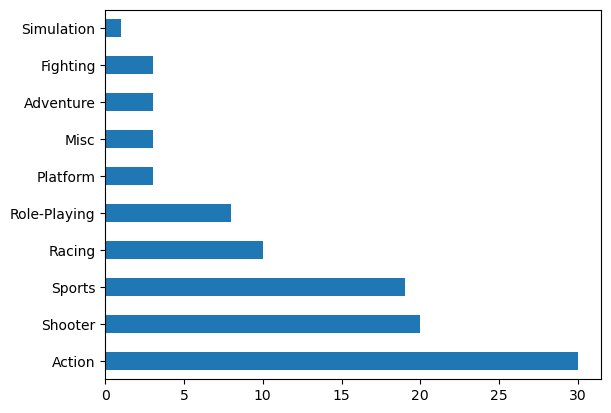

In [177]:
# value_counts()
top_100 = ps3.nlargest(n=100,columns="Global Sales")
top_100["Genre"].value_counts().plot.barh()

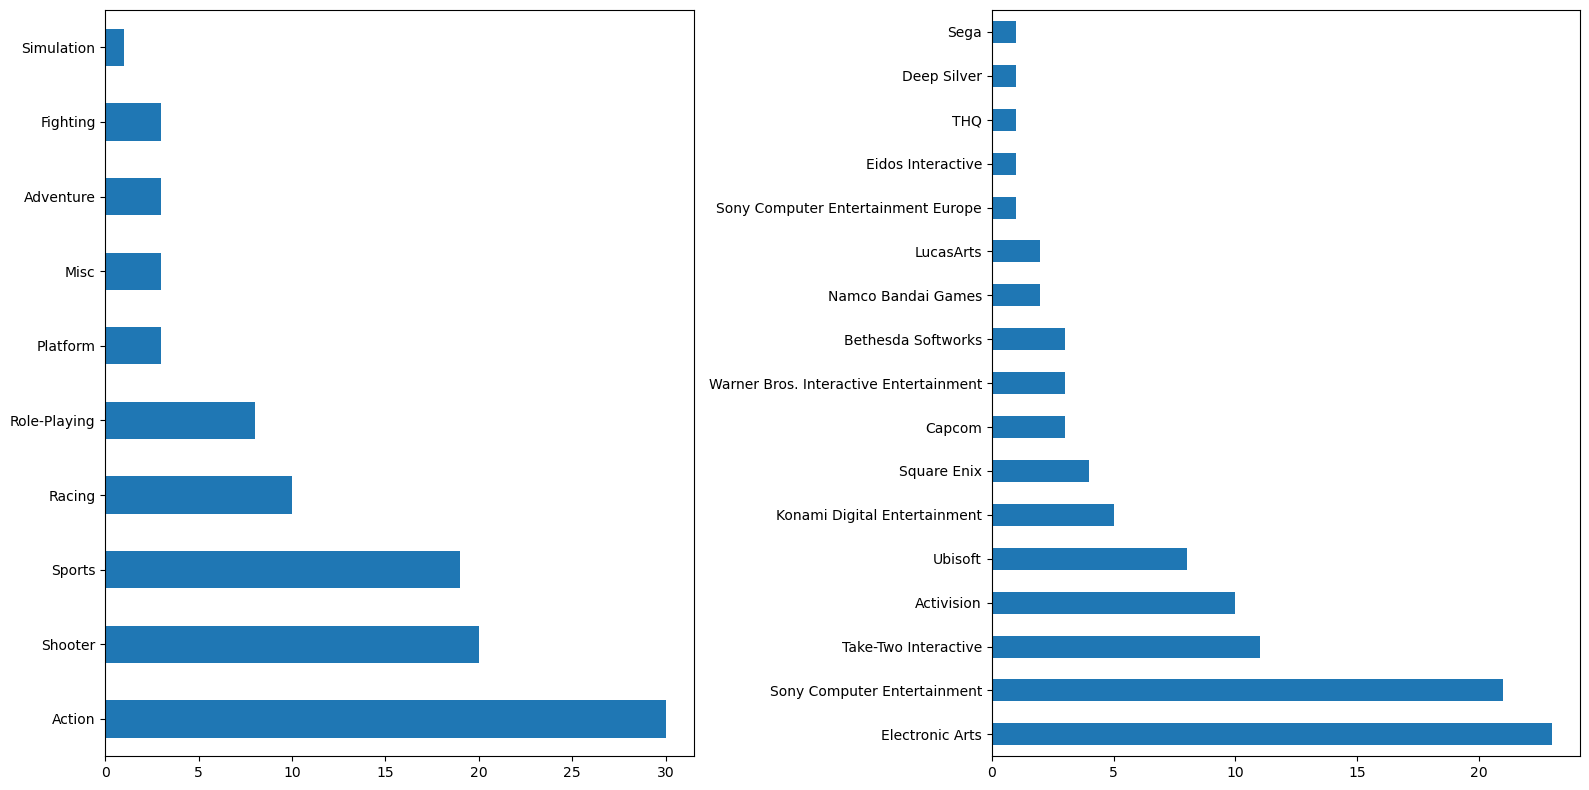

In [181]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
top_100["Genre"].value_counts().plot.barh(ax=ax[0])
top_100["Publisher"].value_counts().plot.barh(ax=ax[1])
plt.tight_layout()

In [185]:
# sort_values()
ps3.sort_values(by=["Genre","Year"], ascending=[True,False])

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
Name,,,,,,,,,
LEGO Marvel's Avengers,PS3,2016,Action,Warner Bros. Interactive Entertainment,0.10,0.17,0.00,0.05,0.32
MLB 16: The Show,PS3,2016,Action,Sony Computer Entertainment,0.13,0.00,0.00,0.03,0.16
Dragon Quest Heroes II: Twin Kings and the Prophecy's End,PS3,2016,Action,Square Enix,0.00,0.00,0.13,0.00,0.13
Lego Star Wars: The Force Awakens,PS3,2016,Action,Warner Bros. Interactive Entertainment,0.03,0.07,0.00,0.02,0.12
Attack on Titan (KOEI),PS3,2016,Action,Tecmo Koei,0.00,0.00,0.06,0.00,0.06
...,...,...,...,...,...,...,...,...,...
Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0.00,0.00,0.04,0.00,0.04
Worms,PS3,2009,Strategy,Sony Computer Entertainment,0.00,0.02,0.00,0.01,0.03
Sid Meier's Civilization Revolution,PS3,2008,Strategy,Take-Two Interactive,0.49,0.19,0.01,0.10,0.79


In [188]:
df["Global Sales"].describe()

count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global Sales, dtype: float64

In [193]:
xbox_sales = df.loc[df.Platform=='XB',['NA_Sales','Year']].groupby("Year")['NA_Sales'].sum()
xbox_sales

Year
2000     0.74
2001    16.61
2002    34.05
2003    39.34
2004    48.47
2005    34.84
2006     7.47
2007     0.41
2008     0.13
Name: NA_Sales, dtype: float64

<AxesSubplot:xlabel='Year'>

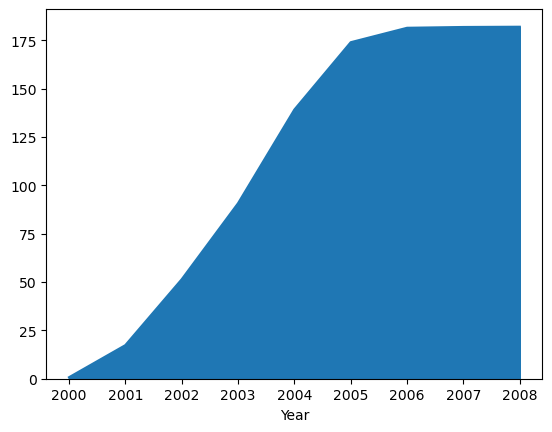

In [195]:
xbox_sales.cumsum().plot.area()

In [197]:
## cut and qcut
pd.cut(x=df.Year,bins=5).value_counts()

(2004.0, 2012.0]     9052
(1996.0, 2004.0]     4185
(2012.0, 2020.0]     2086
(1988.0, 1996.0]      780
(1979.96, 1988.0]     188
Name: Year, dtype: int64

In [200]:
pd.cut(x=df.Year,bins=[1980,1989,1999,2009,20019],labels=["A","B","C","D"]).value_counts()

C    9183
D    5134
B    1769
A     196
Name: Year, dtype: int64

In [202]:
df["new"]=pd.cut(x=df.Year,bins=[1980,1989,1999,2009,20019],labels=["A","B","C","D"]).value_counts(

TypeError: 'Series' object is not callable